In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


# 0) The Iris Dataset

The Iris Dataset includes **3 Iris Species** with **50 samples** each (**150 rows**) and is composed of **6 columns** :

* the **ID** column
* 4 columns of measures on Sepal and Petal : **SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm**
* the column containing the labels : **Iris-setosa, Iris-versicolor, Iris-virginica**

The objective is to build a model that uses the features to  **classify the flowers** with a maximum of accuracy. In order to reach this goal, we are going to perform an **exploratory data analysis** to understand the data and choose the best features. Then we will build a **random forest model** and try to improve its performance firstly by **dropping out the less interesting feature** and secondly by using the **linear discriminant analysis** technic which allows to optimize class separability.

# 1) Importing Iris Dataset and Libraries

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
print("Libraries Imported")

Libraries Imported


In [3]:
file_path = "../input/iris/Iris.csv"

iris_data = pd.read_csv(file_path, index_col="Id")

print("Data Imported")

Data Imported


# 2) Exploratory Data Analysis

### 2.1) General information on the dataset

In [4]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.2) Univariate Analysis

In [8]:
iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
data_setosa = iris_data.loc[iris_data.Species == "Iris-setosa"]
data_versicolor = iris_data.loc[iris_data.Species == "Iris-versicolor"]
data_virginica = iris_data.loc[iris_data.Species == "Iris-virginica"]

* **SepalLengthCm**

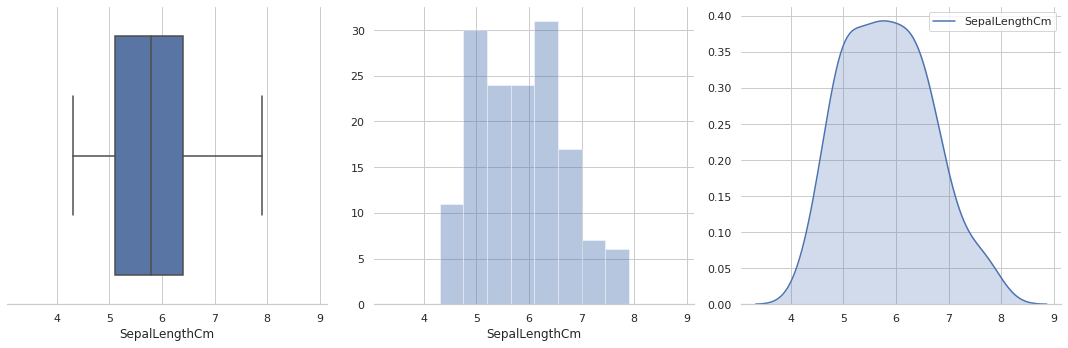

In [10]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)

#Plot the boxplot
sns.boxplot(x = iris_data['SepalLengthCm'], ax=axes[0])

# Plot the histogram
sns.distplot(a=iris_data['SepalLengthCm'], kde=False, ax=axes[1])

# Plot the density plot
sns.kdeplot(data=iris_data['SepalLengthCm'], shade=True, ax=axes[2])

plt.tight_layout()

* **SepalWidthCm**

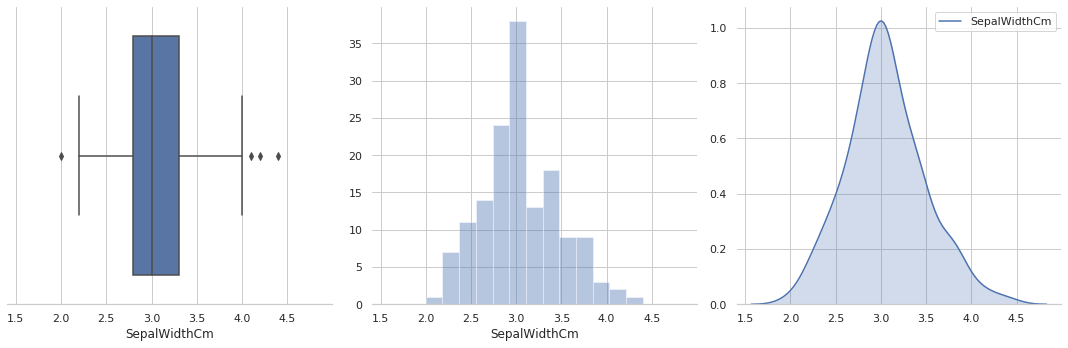

In [11]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)

#Plot the boxplot
sns.boxplot(x = iris_data['SepalWidthCm'], ax=axes[0])

# Plot the histogram
sns.distplot(a=iris_data['SepalWidthCm'], kde=False, ax=axes[1])

# Plot the density plot
sns.kdeplot(data=iris_data['SepalWidthCm'], shade=True, ax=axes[2])

plt.tight_layout()

* **PetalLengthCm**

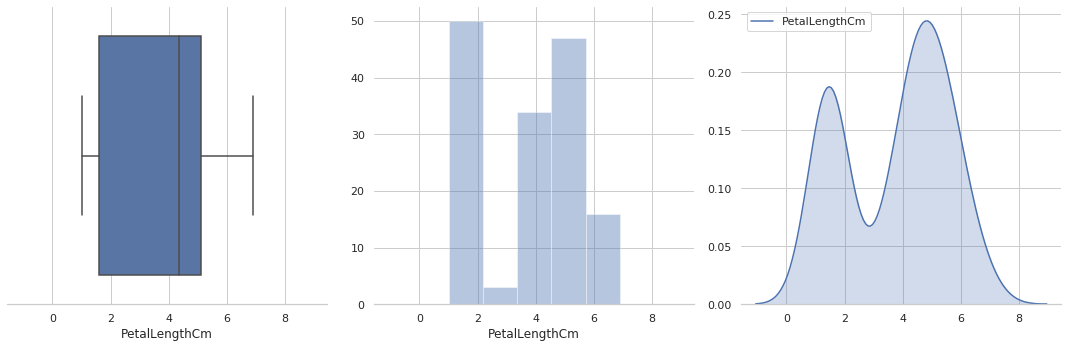

In [12]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)

#Plot the boxplot
sns.boxplot(x = iris_data['PetalLengthCm'], ax=axes[0])

# Plot the histogram
sns.distplot(a=iris_data['PetalLengthCm'], kde=False, ax=axes[1])

# Plot the density plot
sns.kdeplot(data=iris_data['PetalLengthCm'], shade=True, ax=axes[2])

plt.tight_layout()

* **PetalWidthCm**

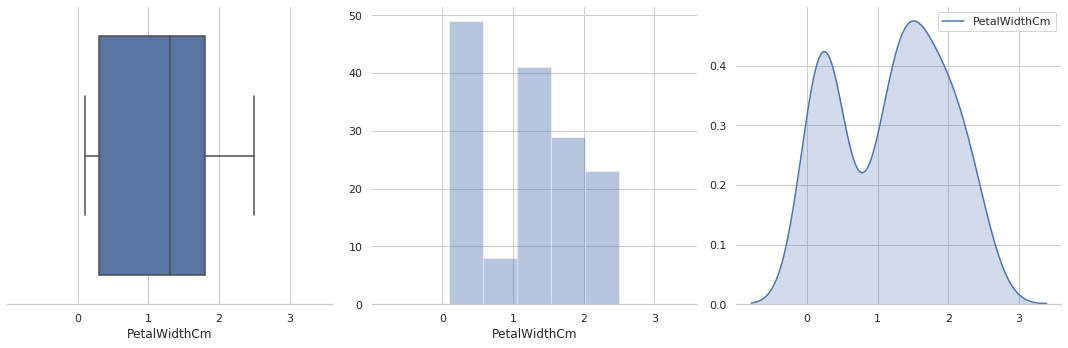

In [13]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)

#Plot the boxplot
sns.boxplot(x = iris_data['PetalWidthCm'], ax=axes[0])

# Plot the histogram
sns.distplot(a=iris_data['PetalWidthCm'], kde=False, ax=axes[1])

# Plot the density plot
sns.kdeplot(data=iris_data['PetalWidthCm'], shade=True, ax=axes[2])

plt.tight_layout()

### 2.3) Multivariate Data Analysis

* **SepalLengthCm vs Species**

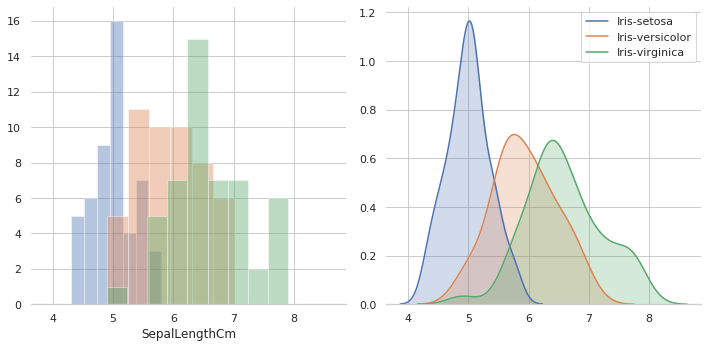

In [14]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)


# Histograms for each species
sns.distplot(a=data_setosa['SepalLengthCm'], label="Iris-setosa", kde=False, ax=axes[0])
sns.distplot(a=data_versicolor['SepalLengthCm'], label="Iris-versicolor", kde=False, ax=axes[0])
sns.distplot(a=data_virginica['SepalLengthCm'], label="Iris-virginica", kde=False, ax=axes[0])

# KDE plots for each species
sns.kdeplot(data=data_setosa['SepalLengthCm'], label="Iris-setosa", shade=True, ax=axes[1])
sns.kdeplot(data_versicolor['SepalLengthCm'], label="Iris-versicolor", shade=True, ax=axes[1])
sns.kdeplot(data=data_virginica['SepalLengthCm'], label="Iris-virginica", shade=True, ax=axes[1])


plt.tight_layout()

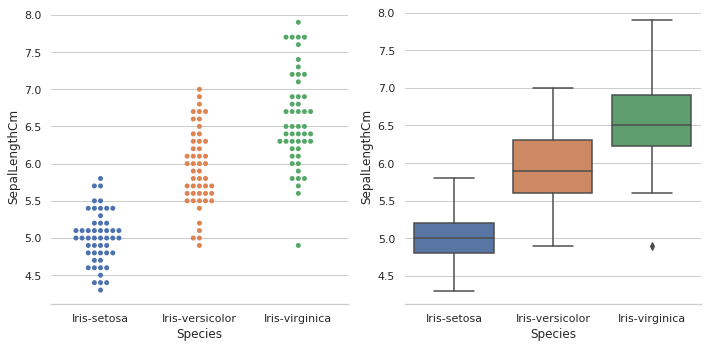

In [15]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=iris_data['Species'], y=iris_data['SepalLengthCm'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=iris_data['Species'], y=iris_data['SepalLengthCm'], ax=axes[1])

plt.tight_layout()

**Comments:**

According to these different plots, the sepal length seems to be quite an interesting feature to use in order to classify the different species. Indeed : 
* the sepal length of Iris-setosa flowers is mainly smaller than the petal length of the two other species
* even if the difference of sepal length is less clear between Iris-versicolor and Iris-virginica, the sepal length of Iris-versicolor flowers is mainly smaller than the sepal length of Iris-virginica flowers

* **SepalWidthCm vs Species**

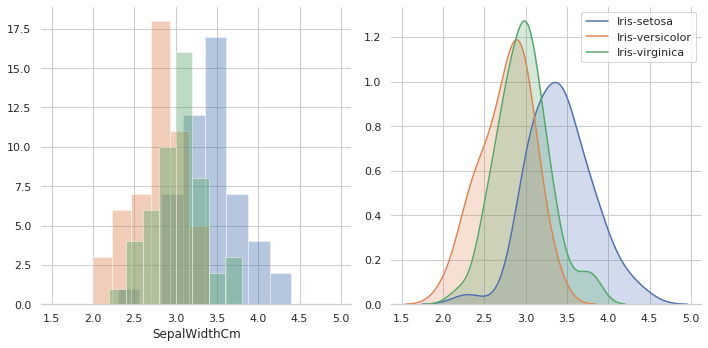

In [16]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Histograms for each species
sns.distplot(a=data_setosa['SepalWidthCm'], label="Iris-setosa", kde=False, ax=axes[0])
sns.distplot(a=data_versicolor['SepalWidthCm'], label="Iris-versicolor", kde=False, ax=axes[0])
sns.distplot(a=data_virginica['SepalWidthCm'], label="Iris-virginica", kde=False, ax=axes[0])

# KDE plots for each species
sns.kdeplot(data=data_setosa['SepalWidthCm'], label="Iris-setosa", shade=True, ax=axes[1])
sns.kdeplot(data_versicolor['SepalWidthCm'], label="Iris-versicolor", shade=True, ax=axes[1])
sns.kdeplot(data=data_virginica['SepalWidthCm'], label="Iris-virginica", shade=True, ax=axes[1])


plt.tight_layout()

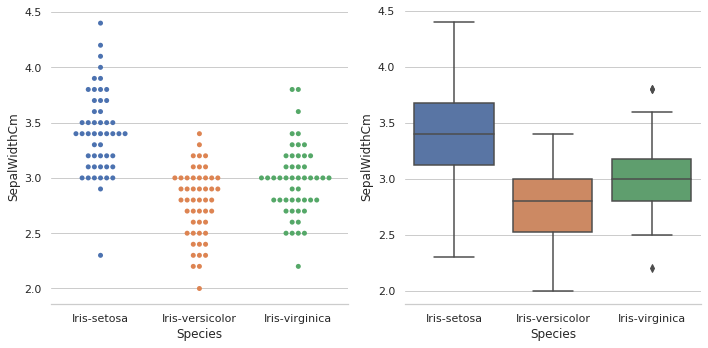

In [17]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=iris_data['Species'], y=iris_data['SepalWidthCm'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=iris_data['Species'], y=iris_data['SepalWidthCm'], ax=axes[1])

plt.tight_layout()

**Comments:**

According to these different plots, the sepal width seems to be the less interesting feature to use in order to classify the different species. Indeed : 
* the sepal width of the Iris-setosa flowers seems to be larger than the sepal width of Iris-versicolor and Iris-virginica but for many samples this difference of size is not true
* the sepal width of the Iris-virginica flowers seems to be larger than the sepal width of Iris-versicolor but for many samples this difference of size is not true

* **PetalLengthCm vs Species**

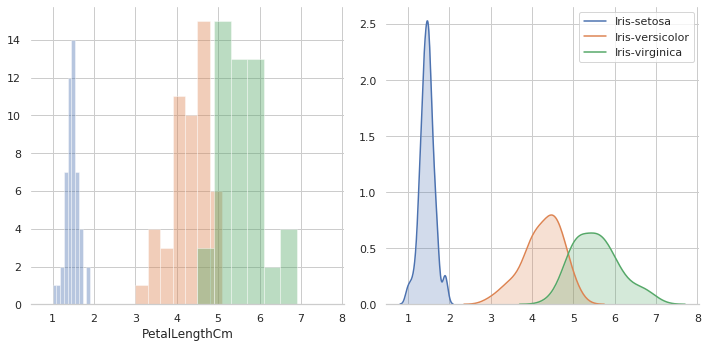

In [18]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Histograms for each species
sns.distplot(a=data_setosa['PetalLengthCm'], label="Iris-setosa", kde=False, ax=axes[0])
sns.distplot(a=data_versicolor['PetalLengthCm'], label="Iris-versicolor", kde=False, ax=axes[0])
sns.distplot(a=data_virginica['PetalLengthCm'], label="Iris-virginica", kde=False, ax=axes[0])

# KDE plots for each species
sns.kdeplot(data=data_setosa['PetalLengthCm'], label="Iris-setosa", shade=True, ax=axes[1])
sns.kdeplot(data_versicolor['PetalLengthCm'], label="Iris-versicolor", shade=True, ax=axes[1])
sns.kdeplot(data=data_virginica['PetalLengthCm'], label="Iris-virginica", shade=True, ax=axes[1])


plt.tight_layout()

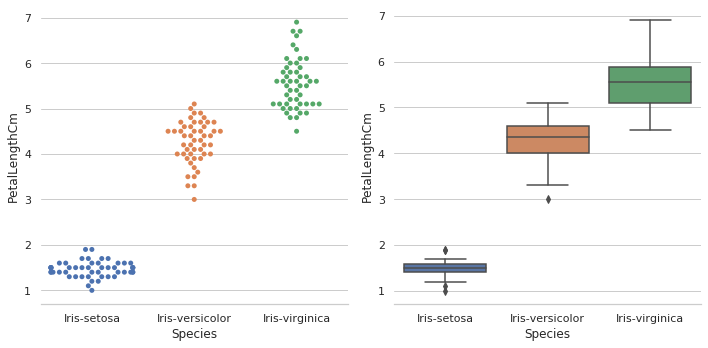

In [19]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=iris_data['Species'], y=iris_data['PetalLengthCm'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=iris_data['Species'], y=iris_data['PetalLengthCm'], ax=axes[1])

plt.tight_layout()

**Comments:**

According to these different plots, the petal length seems to be an interesting feature to use in order to classify the different species. Indeed : 
* the petal length of Iris-setosa flowers is clearly smaller than the petal length of the two other species
* even if the difference of petal length is less clear between Iris-versicolor and Iris-virginica, the petal length of Iris-versicolor flowers is mainly smaller than the petal length of Iris-virginica flowers

* **PetalWidthCm vs Species**

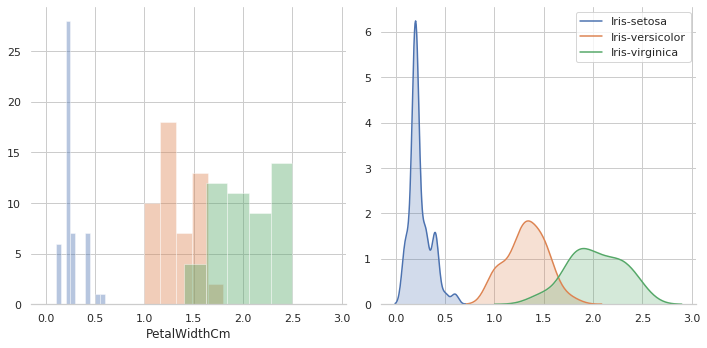

In [20]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Histograms for each species
sns.distplot(a=data_setosa['PetalWidthCm'], label="Iris-setosa", kde=False, ax=axes[0])
sns.distplot(a=data_versicolor['PetalWidthCm'], label="Iris-versicolor", kde=False, ax=axes[0])
sns.distplot(a=data_virginica['PetalWidthCm'], label="Iris-virginica", kde=False, ax=axes[0])

# KDE plots for each species
sns.kdeplot(data=data_setosa['PetalWidthCm'], label="Iris-setosa", shade=True, ax=axes[1])
sns.kdeplot(data_versicolor['PetalWidthCm'], label="Iris-versicolor", shade=True, ax=axes[1])
sns.kdeplot(data=data_virginica['PetalWidthCm'], label="Iris-virginica", shade=True, ax=axes[1])


plt.tight_layout()

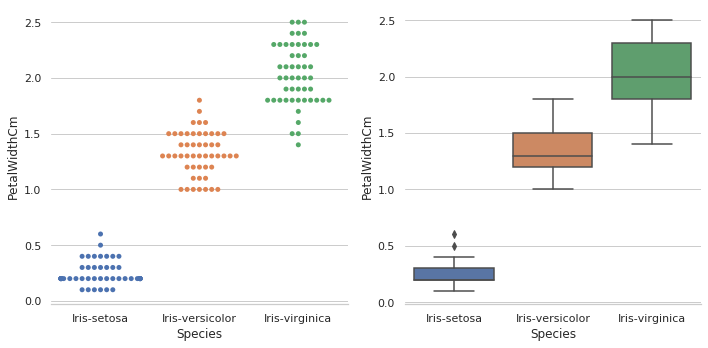

In [21]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=iris_data['Species'], y=iris_data['PetalWidthCm'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=iris_data['Species'], y=iris_data['PetalWidthCm'], ax=axes[1])

plt.tight_layout()

**Comments:**

According to these different plots, the petal width seems to be an interesting feature to use in order to classify the different species. Indeed : 
* the petal width of Iris-setosa flowers is clearly smaller than the petal width of the two other species
* even if the difference of petal width is less clear between Iris-versicolor and Iris-virginica, the petal width of Iris-versicolor flowers is mainly smaller than the petal width of Iris-virginica flowers

* **All features vs All features vs Species**

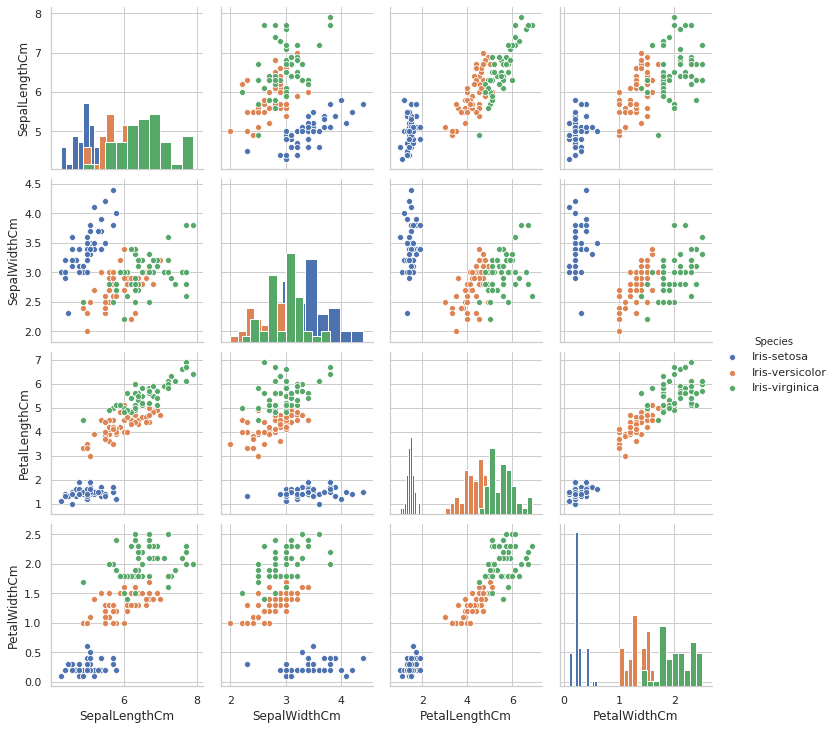

In [22]:
sns.pairplot(iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], hue="Species", diag_kind="hist")

# 3) Data Preprocessing

### 3.1) Traint / Test Split

In [23]:
from sklearn.model_selection import train_test_split

y = iris_data.Species
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']
X = iris_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### 3.2) Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

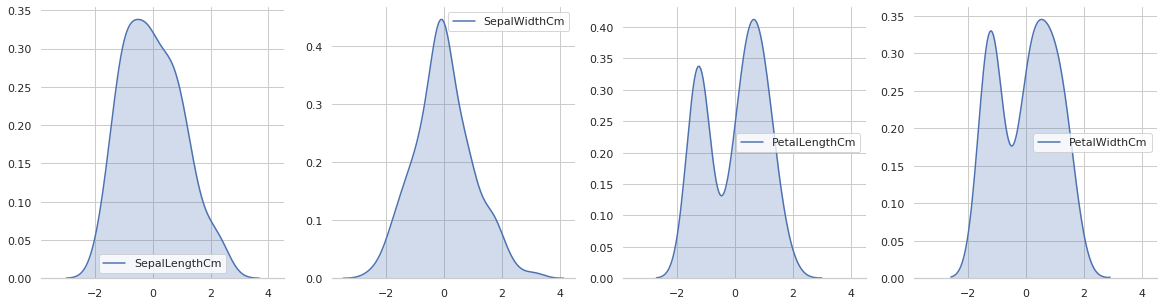

In [25]:
data = pd.DataFrame(X_train)
data.columns = X.columns
data['label'] = y

f, axes = plt.subplots(ncols = 4, figsize=(20, 5), sharex=True)
sns.despine(left=True)

sns.kdeplot(data=data['SepalLengthCm'], shade=True, ax=axes[0])
sns.kdeplot(data=data['SepalWidthCm'], shade=True, ax=axes[1])
sns.kdeplot(data=data['PetalLengthCm'], shade=True, ax=axes[2])
sns.kdeplot(data=data['PetalWidthCm'], shade=True, ax=axes[3])


**Comments:**

As we see on the KDE plots, standardscaler allows to scale the features such that their distribution is now centred around 0 and has a standard deviation of 1. This allows to achieve better performance in classification problems.

# 4) Model development + Linear Discriminant Analysis

### 4.1) Random Forest Model with all the Features

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print('Confusion matrix : \n' + str(confusion_matrix(y_test, y_pred)))
print('Accuracy score : \n' + str(accuracy_score(y_test, y_pred)))

Confusion matrix : 
[[3 0 0]
 [0 8 0]
 [0 1 3]]
Accuracy score : 
0.9333333333333333


**Comments:**

The model accuracy using all the features is 93.33%. We will first try to improve it by dropping out the SepalWidthCM feature because it seems to be the less interesting to achieve the classification.


### 4.2) Random Forest Model without the SepalWidthCm Feature

In [27]:
# Train / Test Split
y_2 = iris_data.Species
features = ['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']
X_2 = iris_data[features]

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.1, random_state=0)

# Standardization
sc = StandardScaler()
X_train_2 = sc.fit_transform(X_train_2)
X_test_2 = sc.transform(X_test_2)

# Model Development
classifier_2 = RandomForestClassifier(max_depth=2, random_state=0)

classifier_2.fit(X_train_2, y_train_2)
y_pred_2 = classifier_2.predict(X_test_2)

print('Confusion matrix : \n' + str(confusion_matrix(y_test, y_pred_2)))
print('Accuracy score : \n' + str(accuracy_score(y_test, y_pred_2)))

Confusion matrix : 
[[3 0 0]
 [0 8 0]
 [0 1 3]]
Accuracy score : 
0.9333333333333333


**Comments:**

The random forest model has the same accuracy score with or without the SepalWidthCm feature.

As we could predict, thanks to the different plots of the data, the random forest model (with all or three features) makes good predictions concerning the Iris-setosa species but has more difficulties with the Iris-versicolor and Iris-virginica species.

In order to solve this problem we will implement a Linear Discrimant Analysis which allows to optimize both class separability and dimensionality reduction (less important in our case given the small number of features of the dataset).

### 4.3) Linear Discriminant Analysis

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

explained_variance = lda.explained_variance_ratio_

print(explained_variance)

[0.99099846 0.00900154]


In [29]:
n_component_1 = 0.99099846
n_component_2 = 0.00900154
percentage_of_variance_explained = n_component_1 + n_component_2
print("Percentage of variance explained = " + str(percentage_of_variance_explained*100))

Percentage of variance explained = 100.0


**Comments:**

The two components of the linear discriminant analysis explains 100% of the variance between classes (Iris-setosa, Iris-versicolor, Iris-virginica).

### 4.4) Random Forest + Linear Discriminant Analysis

In [30]:
classifier_lda = RandomForestClassifier(max_depth=2, random_state=0)

classifier_lda.fit(X_train_lda, y_train)
y_pred_lda = classifier_lda.predict(X_test_lda)

print('Confusion matrix : \n' + str(confusion_matrix(y_test, y_pred_lda)))
print('Accuracy score : \n' + str(accuracy_score(y_test, y_pred_lda)))

Confusion matrix : 
[[3 0 0]
 [0 8 0]
 [0 0 4]]
Accuracy score : 
1.0


**Comments:**

Using the LDA projection of the dataset, the random forest model is able to class the different samples with an accuracy score of 100%. With the original data, the accuray score was 93.33%.